In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fname = "0000004416.nc"

ds = xr.load_dataset(fname)

print(ds)

<xarray.Dataset> Size: 3MB
Dimensions:                          (xgr: 326, depth_id: 150, xgr_xb: 326)
Coordinates:
  * xgr                              (xgr) float64 3kB -6.59 0.5 ... 1.47e+03
  * depth_id                         (depth_id) int64 1kB 0 1 2 ... 147 148 149
  * xgr_xb                           (xgr_xb) float64 3kB -6.59 0.5 ... 1.47e+03
Data variables: (12/35)
    timestep_id                      int64 8B 4416
    timestamp                        datetime64[ns] 8B 2011-07-04
    cumulative_computational_time    float64 8B 6.447e+03
    zgr                              (xgr) float64 3kB -10.0 -10.0 ... 13.25
    angles                           (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    wave_height                      (xgr_xb) float64 3kB 0.4374 0.4733 ... nan
    ...                               ...
    latent_heat_flux                 (xgr) float64 3kB -0.0 -0.0 ... -27.84
    convective_heat_flux             (xgr) float64 3kB 175.5 175.5 ... -392.0
    total_heat

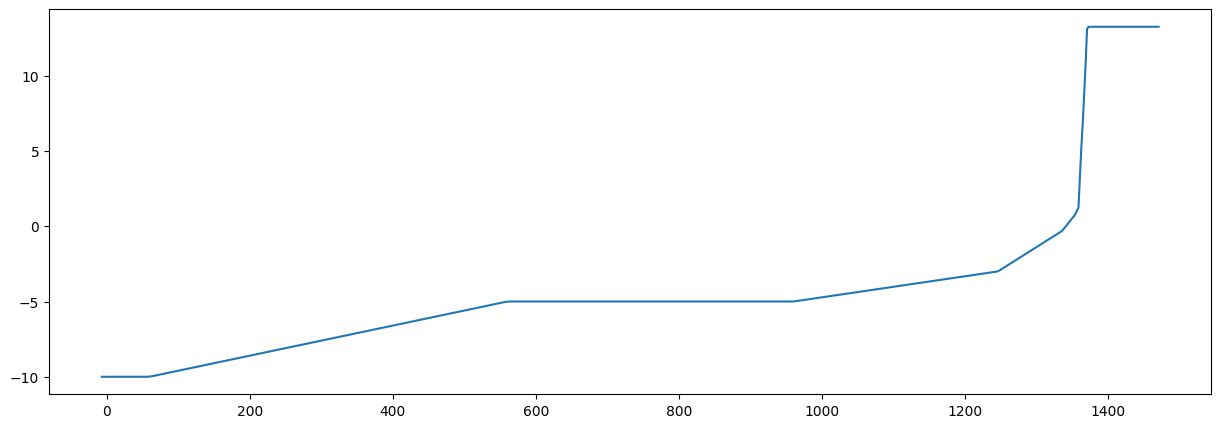

In [3]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds.xgr.values, ds.zgr.values)

In [4]:
740 % 360

20

In [5]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])

gradient = np.gradient(y, x)  #  = dy/dx
angle = np.arctan(gradient) / (2 * np.pi) * 360

print(gradient)
print(angle)

[1. 1. 1. 1. 1. 1.]
[45. 45. 45. 45. 45. 45.]


In [6]:
x = np.array([-2, -1, 0, 1, 2])
y = x**2

gradient = np.gradient(y, x)  #  = dy/dx
angle = np.arctan(gradient) / (2 * np.pi) * 360

print(gradient)
print(angle)

[-3. -2.  0.  2.  3.]
[-71.56505118 -63.43494882   0.          63.43494882  71.56505118]


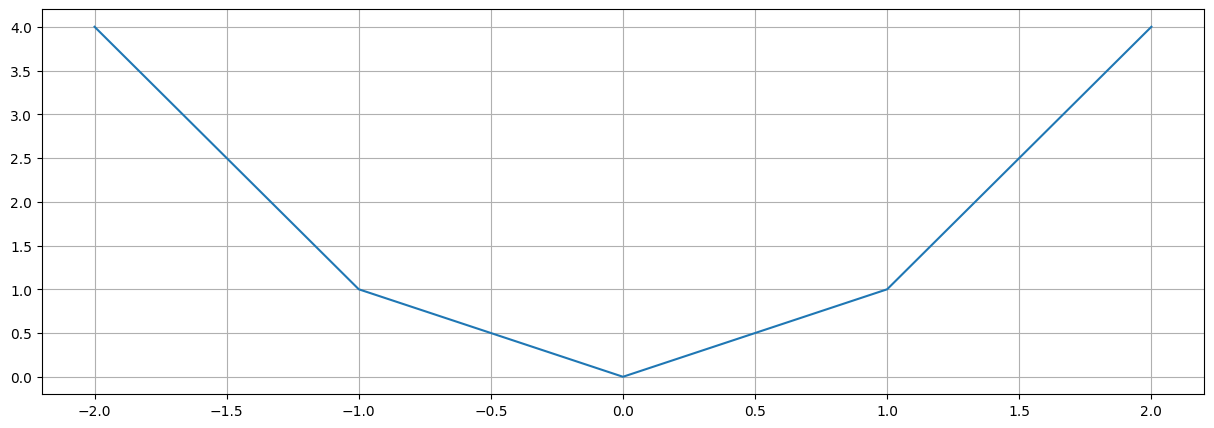

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, y)
ax.grid()

In [12]:
ds = xr.load_dataset('xboutput.nc')

print(ds)

<xarray.Dataset> Size: 73kB
Dimensions:      (ny: 1, nx: 326, globaltime: 2)
Coordinates:
    globalx      (ny, nx) float64 3kB -6.59 0.5 7.59 ... 1.468e+03 1.47e+03
    globaly      (ny, nx) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * globaltime   (globaltime) float64 16B 0.0 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B 9.969e+36
    x            (globaltime, ny, nx) float64 5kB -6.59 0.5 ... 1.47e+03
    y            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zb           (globaltime, ny, nx) float64 5kB -10.0 -10.0 ... 13.25 13.25
    zs           (globaltime, ny, nx) float64 5kB 0.0003256 0.0003256 ... nan
    H            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... nan nan nan
    ...           ...
    Sxx          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Sxy          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Syy          (globaltime, ny, nx) 

[-10.         -10.         -10.         -10.         -10.
 -10.         -10.         -10.         -10.         -10.
  -9.957       -9.886       -9.816       -9.746       -9.676
  -9.606       -9.536       -9.467       -9.398       -9.329
  -9.26        -9.191       -9.123       -9.055       -8.987
  -8.919       -8.851       -8.784       -8.717       -8.65
  -8.583       -8.516       -8.45        -8.384       -8.318
  -8.252       -8.187       -8.121       -8.056       -7.991
  -7.927       -7.862       -7.798       -7.734       -7.67
  -7.607       -7.543       -7.48        -7.417       -7.355
  -7.292       -7.23        -7.168       -7.106       -7.044
  -6.983       -6.922       -6.861       -6.8         -6.74
  -6.68        -6.62        -6.56        -6.501       -6.441
  -6.382       -6.323       -6.265       -6.207       -6.148
  -6.091       -6.033       -5.975       -5.918       -5.861
  -5.805       -5.748       -5.692       -5.636       -5.58
  -5.525       -5.47        -5.415

(1300.0, 1400.0)

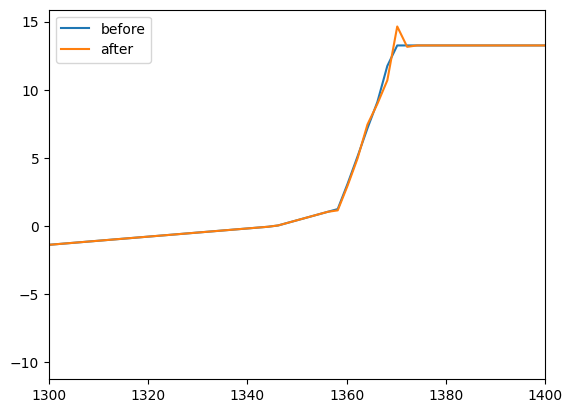

In [21]:
# print(ds.globalx.values[0])
print(ds.zb.values[1,0,:])


plt.plot(ds.globalx.values[0], ds.zb.values[0,0,:], label='before')
plt.plot(ds.globalx.values[0], ds.zb.values[1,0,:], label='after')

plt.legend()
plt.xlim((1300, 1400))